In [1]:
import numpy as np
import matplotlib.pyplot as plt

This toy array has 3 runs of 4 conditions with 5 TRs in each run. We start with an array that has all of the data in one dimension. Let's say that all of run 1 is first (with conditions in order), then all of run 2, then all of run 3.

In [9]:
n_TRs = 5
n_conds = 4
n_runs = 3

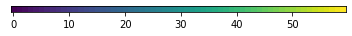

In [10]:
toy = np.arange(n_TRs*n_conds*n_runs)
toy = np.reshape(toy,(n_TRs*n_conds*n_runs,1))
plt.imshow(toy.T)
plt.yticks([]);

Let's say we want to reshape the data by run, keeping time as the first dimension. In this case, we're looking for an array of size 20 x 3. We'll first try `order='C'` since that is the default.

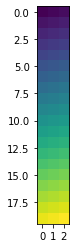

In [14]:
toy_C = np.reshape(toy,(n_TRs*n_conds,-1),order='C')
plt.imshow(toy_C)
plt.xticks([0,1,2]);

This is incorrect - each row of the new array does not contain the data from one run, as shown below.

In [19]:
print(toy_C[:,0])

[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57]


Instead, we need to use `order=F` to keep the runs intact when reshaping.

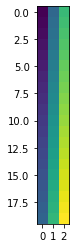

In [21]:
toy_F = np.reshape(toy,(n_TRs*n_conds,-1),order='F')
plt.imshow(toy_F)
plt.xticks([0,1,2]);

Now the runs are intact.

In [22]:
print(toy_F[:,0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


We also need to use `order=F` if we want to reshape by runs. Now we'll reshape into an array of size 5 x 4 x 3.

In [26]:
toy3_F = np.reshape(toy, (n_TRs,n_conds,n_runs), order='F')
print(toy3_F.shape)

(5, 4, 3)


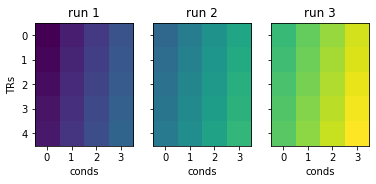

In [31]:
fig,ax = plt.subplots(1,3,sharey=True)
ax[0].set_ylabel('TRs')
for i in range(n_runs):
  ax[i].imshow(toy3_F[:,:,i],vmin=0, vmax=59)
  ax[i].set_xlabel('conds')
  ax[i].set_xticks(np.arange(4))
  ax[i].set_title('run %d'%(i+1))

Each heatmap is a separate run, and each column is a condition.

`order=F` is also necessary if/when we have to string the data back out. For the toy example, we could use `np.flatten`, but with the real data there will be other dimensions that need to be preserved.

In [32]:
toy_back_out_C = np.reshape(toy3_F,(-1))
print(toy_back_out_C.shape)

(60,)


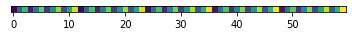

In [36]:
toy_back_out_C = np.reshape(toy_back_out_C, (60,1))
plt.imshow(toy_back_out_C.T)
plt.yticks([]);

In [38]:
print(toy_back_out_C.T[:20])

[[ 0 20 40  5 25 45 10 30 50 15 35 55  1 21 41  6 26 46 11 31 51 16 36 56
   2 22 42  7 27 47 12 32 52 17 37 57  3 23 43  8 28 48 13 33 53 18 38 58
   4 24 44  9 29 49 14 34 54 19 39 59]]


In [39]:
toy_back_out_F = np.reshape(toy3_F,(-1),order='F')
print(toy_back_out_F.shape)

(60,)


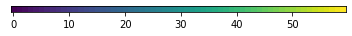

In [40]:
toy_back_out_F = np.reshape(toy_back_out_F, (60,1))
plt.imshow(toy_back_out_F.T)
plt.yticks([]);